## Funciones que crean un dataset en funcion de un json

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
# Funciones para extraer la información de los JSON

# Definir la función para obtener el texto de los hashtags
def get_hashtags_text(x):
    if pd.notna(x) and 'hashtags' in x and x['hashtags']:
        hashtags = x['hashtags']
        hashtags_text = [ht['text'] for ht in hashtags]
        return hashtags_text
    else:
        return None

def get_urls(x):
    if pd.notna(x) and 'urls' in x and x['urls']:
        return True
    return False


def get_user_location(x):
    if pd.notna(x) and 'location' in x:
        return x['location']
    else:
        return None
    


def load_json_old(file_path):
    """
    Carga un archivo JSON en un DataFrame de Pandas.

    Args:
        file_path (str): Ruta del archivo JSON.

    Returns:
        pandas.DataFrame: DataFrame con los datos del archivo JSON.
    """
    # Crear un nuevo DataFrame vacío
    df_new = pd.DataFrame()

    try:
        # Leer el archivo JSON línea por línea y cargar los datos en una lista
        datos_json = []
        with open(file_path, "r", encoding="utf-8") as f:
            for line in f:
                data = json.loads(line)
                if 'retweeted_status' in data and data['retweeted_status'] != None:
                    data = data['retweeted_status']
                datos_json.append(data)

        # Convertir la lista de datos en un DataFrame de Pandas
        df = pd.DataFrame(datos_json)

        # Actualizar las columnas del nuevo DataFrame con los datos válidos
        df_new['id'] = df['id']
        df_new['lang'] = df['lang']
        df_new['text'] = df['text']
        df_new['favorite_count'] = df['favorite_count']
        df_new['retweet_count'] = df['retweet_count']
        df_new['possibly_sensitive'] = df['possibly_sensitive']
        df_new['created_at'] = df['created_at']
        df_new['is_quote_status'] = df['is_quote_status']
        #df_new = df_new[df['retweeted_status'].isna()]
        df_new['entities_hashtags_text'] = df['entities'].apply(get_hashtags_text)
        df_new['entities_urls'] = df['entities'].apply(get_urls)
        df_new['user_location'] = df['user'].apply(get_user_location)

        # Manejar la excepción de KeyError para las columnas opcionales
        try:
            df_new['reply_count'] = df['reply_count']
            df_new['quote_count'] = df['quote_count']
        except KeyError as e:
            print(f'Una o más columnas no existen en el archivo JSON: {e}')

        # Eliminar las columnas "user" y "entities"
        #df_new.drop(['user', 'entities'], axis=1, inplace=True)

    except Exception as e:
        print(f'Se produjo una excepción: {e}')

    # Retornar el DataFrame resultante
    return df_new


def load_json(file_path):
    """
    Carga un archivo JSON en un DataFrame de Pandas.

    Args:
        file_path (str): Ruta del archivo JSON.

    Returns:
        pandas.DataFrame: DataFrame con los datos del archivo JSON.
    """
    try:
        # Leer el archivo JSON línea por línea y cargar los datos en una lista
        datos_json = []
        with open(file_path, "r", encoding="utf-8") as f:
            for line in f:
                data = json.loads(line)
                if 'retweeted_status' in data and data['retweeted_status'] != None:
                    data = data['retweeted_status']
                datos_json.append(data)

        # Convertir la lista de datos en un DataFrame de Pandas
        df = pd.DataFrame(datos_json)

        # Crear un nuevo DataFrame a partir de las columnas necesarias del DataFrame original
        df_new = df[['id', 'lang', 'text', 'favorite_count', 'retweet_count',
                     'possibly_sensitive', 'created_at', 'is_quote_status']]
        df_new['entities_hashtags_text'] = df['entities'].apply(get_hashtags_text)
        df_new['entities_urls'] = df['entities'].apply(get_urls)
        df_new['user_location'] = df['user'].apply(get_user_location)

        # Manejar la excepción de KeyError para las columnas opcionales
        try:
            df_new['reply_count'] = df['reply_count']
            df_new['quote_count'] = df['quote_count']
        except KeyError as e:
            print(f'Una o más columnas no existen en el archivo JSON: {e}')

        # Retornar el DataFrame resultante
        return df_new

    except Exception as e:
        print(f'Se produjo una excepción: {e}')





## Terremoto mexico 2017

In [10]:
# Creamos el nuevo df con los datos mezclados
mexico2017_json = load_json('RDATA/CrisisMMD_v2.0/json/mexico_earthquake_final_data.json')
mexico2017_tsv = pd.read_table('RDATA/CrisisMMD_v2.0/annotations/mexico_earthquake_final_data.tsv')

mexico2017 = pd.merge(mexico2017_json, mexico2017_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                    left_on='id', right_on='tweet_id', how='left')
mexico2017.drop('tweet_id',axis=1,inplace=True)
mexico2017['text_info'] = mexico2017['text_info'].notna()
mexico2017.T


C:\Users\steve\AppData\Local\Temp\ipykernel_12256\762486563.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['entities_hashtags_text'] = df['entities'].apply(get_hashtags_text)
C:\Users\steve\AppData\Local\Temp\ipykernel_12256\762486563.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['entities_urls'] = df['entities'].apply(get_urls)
C:\Users\steve\AppData\Local\Temp\ipykernel_12256\762486563.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,0,1,2,3,4,5,6,7,8,9,...,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336
id,910513784619520000,910523388598280192,910489180555431936,910523397448314882,910523407489470464,910522717677506561,910306865208229888,910401513012563968,910523518827167744,910212856855121925,...,915992255583854592,916000251210797056,916027579882029056,916075589131436032,916099461444710400,916105333872918528,916105374134042624,916112796194021376,916164076484653056,916167674673156096
lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
text,Our solidarity with the victims of the earthqu...,Mexico earthquake: Many children killed at pri...,#BREAKING: Israel search &amp; rescue mission ...,Obama’s Response To The Earthquake In #MexicoC...,"NEWS: At least 200 people, including 21 childr...","Deadly earthquake shakes Mexico City, causes b...",We are praying for all the people in Mexico wh...,7.1 magnitude earthquake hits Mexico Central. ...,At least 49 dead as strong 7.1 magnitude earth...,Mexico City airport after today's earthquake. ...,...,Mexico City prosecutors open criminal probes i...,Mexico earthquake hits home for Hollabaugh Bro...,Sun-Earthquake Model Matches M8.1 in Mexico ht...,A Wave Of Natural Disasters Strike Mexico http...,This Podcast Shines a Light on the Volunteers ...,Carlos santana donates $100k to mexico earthqu...,Seth troxler donates 10k to earthquake relief ...,Entercom/San Francisco Stations Raise Funds Fo...,Mexico Earthquakes | International Medical Cor...,Napa school employee Valentin Fuentes Villanue...
favorite_count,3943,0,147,0,0,2,286,42,0,6090,...,0,0,0,0,0,0,0,0,0,0
retweet_count,1399,0,145,0,0,3,86,49,0,5149,...,0,0,0,0,0,0,0,0,0,0
possibly_sensitive,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
created_at,Wed Sep 20 14:39:37 +0000 2017,Wed Sep 20 15:17:47 +0000 2017,Wed Sep 20 13:01:51 +0000 2017,Wed Sep 20 15:17:49 +0000 2017,Wed Sep 20 15:17:51 +0000 2017,Wed Sep 20 15:15:07 +0000 2017,Wed Sep 20 00:57:24 +0000 2017,Wed Sep 20 07:13:29 +0000 2017,Wed Sep 20 15:18:18 +0000 2017,Tue Sep 19 18:43:50 +0000 2017,...,Thu Oct 05 17:29:06 +0000 2017,Thu Oct 05 18:00:53 +0000 2017,Thu Oct 05 19:49:28 +0000 2017,Thu Oct 05 23:00:14 +0000 2017,Fri Oct 06 00:35:06 +0000 2017,Fri Oct 06 00:58:26 +0000 2017,Fri Oct 06 00:58:36 +0000 2017,Fri Oct 06 01:28:05 +0000 2017,Fri Oct 06 04:51:51 +0000 2017,Fri Oct 06 05:06:09 +0000 2017
is_quote_status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities_hashtags_text,None,None,[BREAKING],"[MexicoCity, President, SoundsLike]",None,None,None,"[FuerzaMexico, PrayForMexico]",None,None,...,None,None,None,None,None,None,None,None,None,None
entities_urls,False,True,False,True,False,True,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True


       quote_count  favorite_count  reply_count  retweet_count
count  1337.000000     1337.000000  1336.000000    1337.000000
mean      1.026178       19.960359     0.547156      12.545999
std      12.108173      224.663003     4.187643     159.094056
min       0.000000        0.000000     0.000000       0.000000
25%       0.000000        0.000000     0.000000       0.000000
50%       0.000000        0.000000     0.000000       0.000000
75%       0.000000        0.000000     0.000000       0.000000
max     358.000000     6090.000000    71.000000    5149.000000


'\nplt.hist(new_mexico2017[\'quote_count\'], bins=10)  # Reemplaza \'columna\' con el nombre de la columna que deseas graficar\n\n# Agregar etiquetas de valores encima de las barras\nfor i, v in enumerate(new_mexico2017[\'quote_count\'].value_counts().values):\n    plt.text(i, v + 1, str(v), ha="center")\n\n# Agregar etiquetas de ejes y título\nplt.xlabel("")\nplt.ylabel("")\nplt.title("quote_count")\nplt.xticks(rotation=90)\n# Mostrar el gráfico\nplt.show()\n\n# Crear un histograma para una columna específica del DataFrame\nplt.hist(new_mexico2017[\'favorite_count\'], bins=10)  # Reemplaza \'columna\' con el nombre de la columna que deseas graficar\n\n# Agregar etiquetas de valores encima de las barras\nfor i, v in enumerate(new_mexico2017[\'favorite_count\'].value_counts().values):\n    plt.text(i, v + 1, str(v), ha="center")\n\n# Agregar etiquetas de ejes y título\nplt.xlabel("")\nplt.ylabel("")\nplt.title("favorite_count")\nplt.xticks(rotation=90)\n# Mostrar el gráfico\nplt.show()\

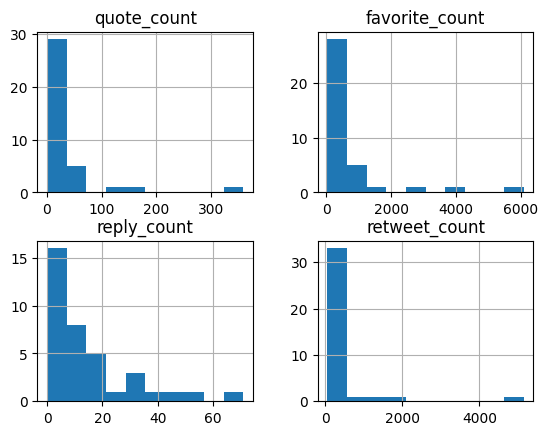

In [6]:

def hist_interaction(df):
    print(df[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].describe())
    new_df = df[df['retweet_count'] > 50]
    new_df[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].hist()

hist_interaction(mexico2017)
  
'''
print(mexico2017[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].describe())
new_mexico2017 = mexico2017[mexico2017['retweet_count'] > 50]
new_mexico2017[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].hist()
#new_mexico2017
'''
# Crear un histograma para una columna específica del DataFrame
'''
plt.hist(new_mexico2017['quote_count'], bins=10)  # Reemplaza 'columna' con el nombre de la columna que deseas graficar

# Agregar etiquetas de valores encima de las barras
for i, v in enumerate(new_mexico2017['quote_count'].value_counts().values):
    plt.text(i, v + 1, str(v), ha="center")

# Agregar etiquetas de ejes y título
plt.xlabel("")
plt.ylabel("")
plt.title("quote_count")
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

# Crear un histograma para una columna específica del DataFrame
plt.hist(new_mexico2017['favorite_count'], bins=10)  # Reemplaza 'columna' con el nombre de la columna que deseas graficar

# Agregar etiquetas de valores encima de las barras
for i, v in enumerate(new_mexico2017['favorite_count'].value_counts().values):
    plt.text(i, v + 1, str(v), ha="center")

# Agregar etiquetas de ejes y título
plt.xlabel("")
plt.ylabel("")
plt.title("favorite_count")
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

# Crear un histograma para una columna específica del DataFrame
plt.hist(new_mexico2017['reply_count'], bins=10)  # Reemplaza 'columna' con el nombre de la columna que deseas graficar

# Agregar etiquetas de valores encima de las barras
for i, v in enumerate(new_mexico2017['reply_count'].value_counts().values):
    plt.text(i, v + 1, str(v), ha="center")

# Agregar etiquetas de ejes y título
plt.xlabel("")
plt.ylabel("")
plt.title("reply_count")
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

# Crear un histograma para una columna específica del DataFrame
plt.hist(new_mexico2017['retweet_count'], bins=10)  # Reemplaza 'columna' con el nombre de la columna que deseas graficar

# Agregar etiquetas de valores encima de las barras
for i, v in enumerate(new_mexico2017['retweet_count'].value_counts().values):
    plt.text(i, v + 1, str(v), ha="center")

# Agregar etiquetas de ejes y título
plt.xlabel("")
plt.ylabel("")
plt.title("retweet_count")
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()'''

In [7]:

def top50_hashtags(df):
    # Convertir los valores en la columna 'entities_hashtags_text' a listas de strings o None
    df['entities_hashtags_text'] = df['entities_hashtags_text'].apply(lambda x: x if x is None else [s.lower() for s in x])

    # Usar el método explode para convertir las listas en filas individuales
    df_exploded = df.explode('entities_hashtags_text')


    # Obtener la frecuencia de cada string ignorando las mayúsculas
    hashtags_text_counts = df_exploded['entities_hashtags_text'].str.lower().value_counts()

    # Obtener los más repetidos (ignorando las mayúsculas)
    hashtags_text_top = hashtags_text_counts.head(50)

    # Mostrar los resultados
    print(hashtags_text_top)

top50_hashtags(mexico2017)
'''
# Convertir los valores en la columna 'entities_hashtags_text' a listas de strings o None
mexico2017['entities_hashtags_text'] = mexico2017['entities_hashtags_text'].apply(lambda x: x if x is None else [s.lower() for s in x])

# Usar el método explode para convertir las listas en filas individuales
mexico2017_exploded = mexico2017.explode('entities_hashtags_text')


# Obtener la frecuencia de cada string ignorando las mayúsculas
hashtags_text_counts = mexico2017_exploded['entities_hashtags_text'].str.lower().value_counts()

# Obtener los más repetidos (ignorando las mayúsculas)
hashtags_text_top = hashtags_text_counts.head(50)

# Mostrar los resultados
print(hashtags_text_top)'''
#mexico2017_exploded.T

entities_hashtags_text
mexicoearthquake        160
mexico                  138
earthquake               90
news                     20
fuerzamexico             12
mexicoquake              12
usrc                     11
mexicocity               11
japan                     7
sismo                     7
mexicocityearthquake      6
breaking                  6
world                     5
sismomx                   5
oaxaca                    5
frida                     5
socialmedia               5
prayformexico             5
puertorico                5
noticias                  4
dogs                      4
vídeo                     4
fuerzamexco               4
california                4
hurricane                 4
usnews                    4
painting                  4
artoftheday               4
tisnews                   4
cdmx                      4
nepal                     4
mexicoestadepie           4
israel                    4
florida                   4
quake                    

"\n# Convertir los valores en la columna 'entities_hashtags_text' a listas de strings o None\nmexico2017['entities_hashtags_text'] = mexico2017['entities_hashtags_text'].apply(lambda x: x if x is None else [s.lower() for s in x])\n\n# Usar el método explode para convertir las listas en filas individuales\nmexico2017_exploded = mexico2017.explode('entities_hashtags_text')\n\n\n# Obtener la frecuencia de cada string ignorando las mayúsculas\nhashtags_text_counts = mexico2017_exploded['entities_hashtags_text'].str.lower().value_counts()\n\n# Obtener los más repetidos (ignorando las mayúsculas)\nhashtags_text_top = hashtags_text_counts.head(50)\n\n# Mostrar los resultados\nprint(hashtags_text_top)"

In [32]:
# Especificar el string que quieres buscar
string_buscar = "sismo"

# Usar str.contains() para obtener una máscara booleana
mask = mexico2017['text'].str.contains(string_buscar, case=False)

# Aplicar la máscara para filtrar las filas del DataFrame
filas_encontradas = mexico2017[mask]

# Mostrar las filas encontradas
filas_encontradas


,id,lang,text,favorite_count,retweet_count,possibly_sensitive,created_at,is_quote_status,entities_hashtags_text,entities_urls,user_location,reply_count,quote_count,text_info,text_info_conf,text_human,text_human_conf
28,910524679777001472,en,@DUALIPA #sismo earthquake in mexico https://t...,0,0,False,Wed Sep 20 15:22:55 +0000 2017,False,[sismo],False,None,0.0,0,informative,1.0000,other_relevant_information,1.0000
285,910619921452818433,en,#Earthquake (#sismo) possibly felt 2 min ago i...,0,0,False,Wed Sep 20 21:41:22 +0000 2017,False,"[earthquake, sismo, mexico]",True,"based in Paris, works globally",0.0,0,informative,1.0000,other_relevant_information,1.0000
343,910639492301647874,en,Mexico earthquake kills five at one of the cou...,0,0,False,Wed Sep 20 22:59:08 +0000 2017,False,[sismo],False,"Distrito Federal, México",0.0,0,informative,1.0000,injured_or_dead_people,1.0000
518,910732644194881536,en,Where to Donate to #Mexico Earthquake Victims ...,0,0,False,Thu Sep 21 05:09:17 +0000 2017,False,"[mexico, cdmx, sismomexico2017, sismomx, cdmxs...",True,None,0.0,0,informative,1.0000,rescue_volunteering_or_donation_effort,1.0000
702,911680405236891648,en,Real man are Unstoppable...ὄAἿC἟2἟D\n.\n#Fuerz...,0,0,False,Sat Sep 23 19:55:21 +0000 2017,False,"[fuerzaméxico, mexicoearthquake, sismomexico]",False,"Fuck off, Ca.",0.0,0,not_informative,0.7500,not_humanitarian,0.7500
706,911107433853992962,en,#Earthquake Golfo de California #Mexico Update...,18,26,False,Fri Sep 22 05:58:34 +0000 2017,False,"[earthquake, mexico, sinaloa, sismo, temblor]",False,"Mexico , Guadalajara Jalisco",0.0,3,NaN,NaN,NaN,NaN
782,911781151379001345,en,New #Earthquake.\n4.2 - 11km N of Union Hidalg...,0,0,False,Sun Sep 24 02:35:41 +0000 2017,False,"[earthquake, mexico, temblor, sismo]",False,Chile,0.0,0,informative,0.6938,other_relevant_information,0.6938
827,911885853433192448,en,#Sismomexico2017 plus 3 days #motorcycles taki...,0,0,False,Sun Sep 24 09:31:44 +0000 2017,False,"[sismomexico2017, motorcycles, mexicoearthquake]",False,"Poole, England",0.0,0,informative,1.0000,rescue_volunteering_or_donation_effort,1.0000
893,912045277170806786,en,Los Angeles Times. Mexicans are save themselve...,0,0,False,Sun Sep 24 20:05:13 +0000 2017,False,[sismo],True,None,0.0,0,informative,0.6753,other_relevant_information,0.6753
929,912128071947481090,en,Great talent tomorrow at @lprnyc\nin support o...,0,0,False,Mon Sep 25 01:34:13 +0000 2017,False,[sismomx],True,New York City,0.0,0,not_informative,0.6441,not_humanitarian,0.6441


In [38]:
# Obtener la cantidad de diferentes tipos en las columnas 'text_info', 'text_human' y 'user_location'
text_info_counts = mexico2017['text_info'].value_counts()
text_human_counts = mexico2017['text_human'].value_counts()
user_location_counts = mexico2017['user_location'].value_counts().head(100)



# Imprimir los resultados
print("Cantidad de diferentes tipos en 'text_info':")
print(text_info_counts)


print("\nCantidad de diferentes tipos en 'text_human':")
print(text_human_counts)

print("\nCantidad de diferentes tipos en 'user_location':")
print(user_location_counts)
#l= mexico2017['user_location'].unique().tolist()
#rint(l)

# Obtener la cantidad de localizaciones repetidas
localizaciones_repetidas = mexico2017['user_location'].value_counts()

# Convertir la Serie a un DataFrame
df_localizaciones_repetidas = localizaciones_repetidas.reset_index()

# Renombrar las columnas del DataFrame
df_localizaciones_repetidas.columns = ['user_location', 'cantidad']

# Convertir el DataFrame a una lista de tuplas (localizacion, cantidad)
#lista_localizaciones = [(localizacion, cantidad) for localizacion, cantidad in df_localizaciones_repetidas.itertuples(index=False)]
# 
# Mostrar la lista de localizaciones repetidas
#print(lista_localizaciones) ESTO NO SE PUEDE , HAY QUE CLASIFICARLO DE ALGUNA FORMA 

Cantidad de diferentes tipos en 'text_info':
text_info
informative        873
not_informative    294
Name: count, dtype: int64

Cantidad de diferentes tipos en 'text_human':
text_human
other_relevant_information                383
not_humanitarian                          294
rescue_volunteering_or_donation_effort    266
injured_or_dead_people                    106
infrastructure_and_utility_damage          82
affected_individuals                       23
missing_or_found_people                    11
vehicle_damage                              2
Name: count, dtype: int64

Cantidad de diferentes tipos en 'user_location':
user_location
United States                  26
Los Angeles, CA                23
London                         21
Los Angeles / Boyle Heights    20
USA                            16
                               ..
Larry world                     2
Provo, Utah                     2
America                         2
London / Londres / Mexico       2
Philadelphia, PA 

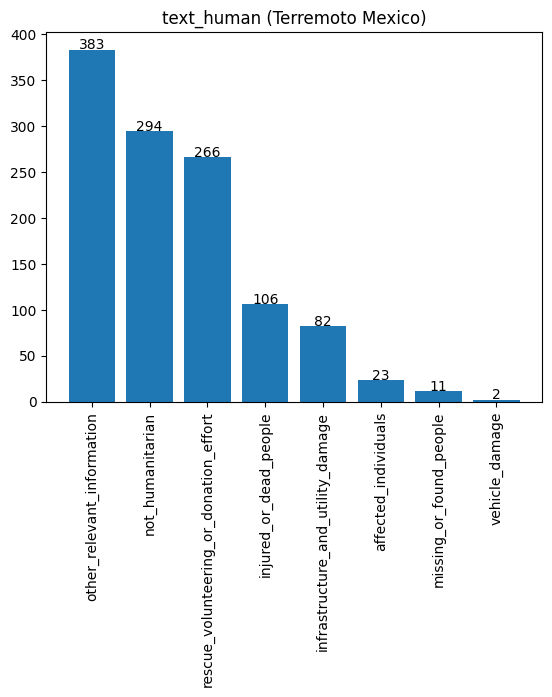

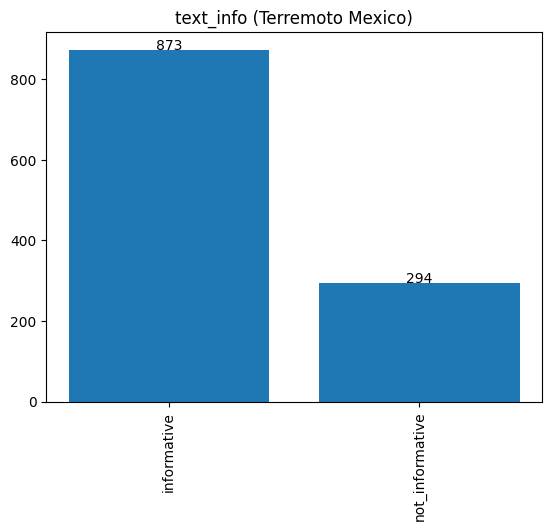

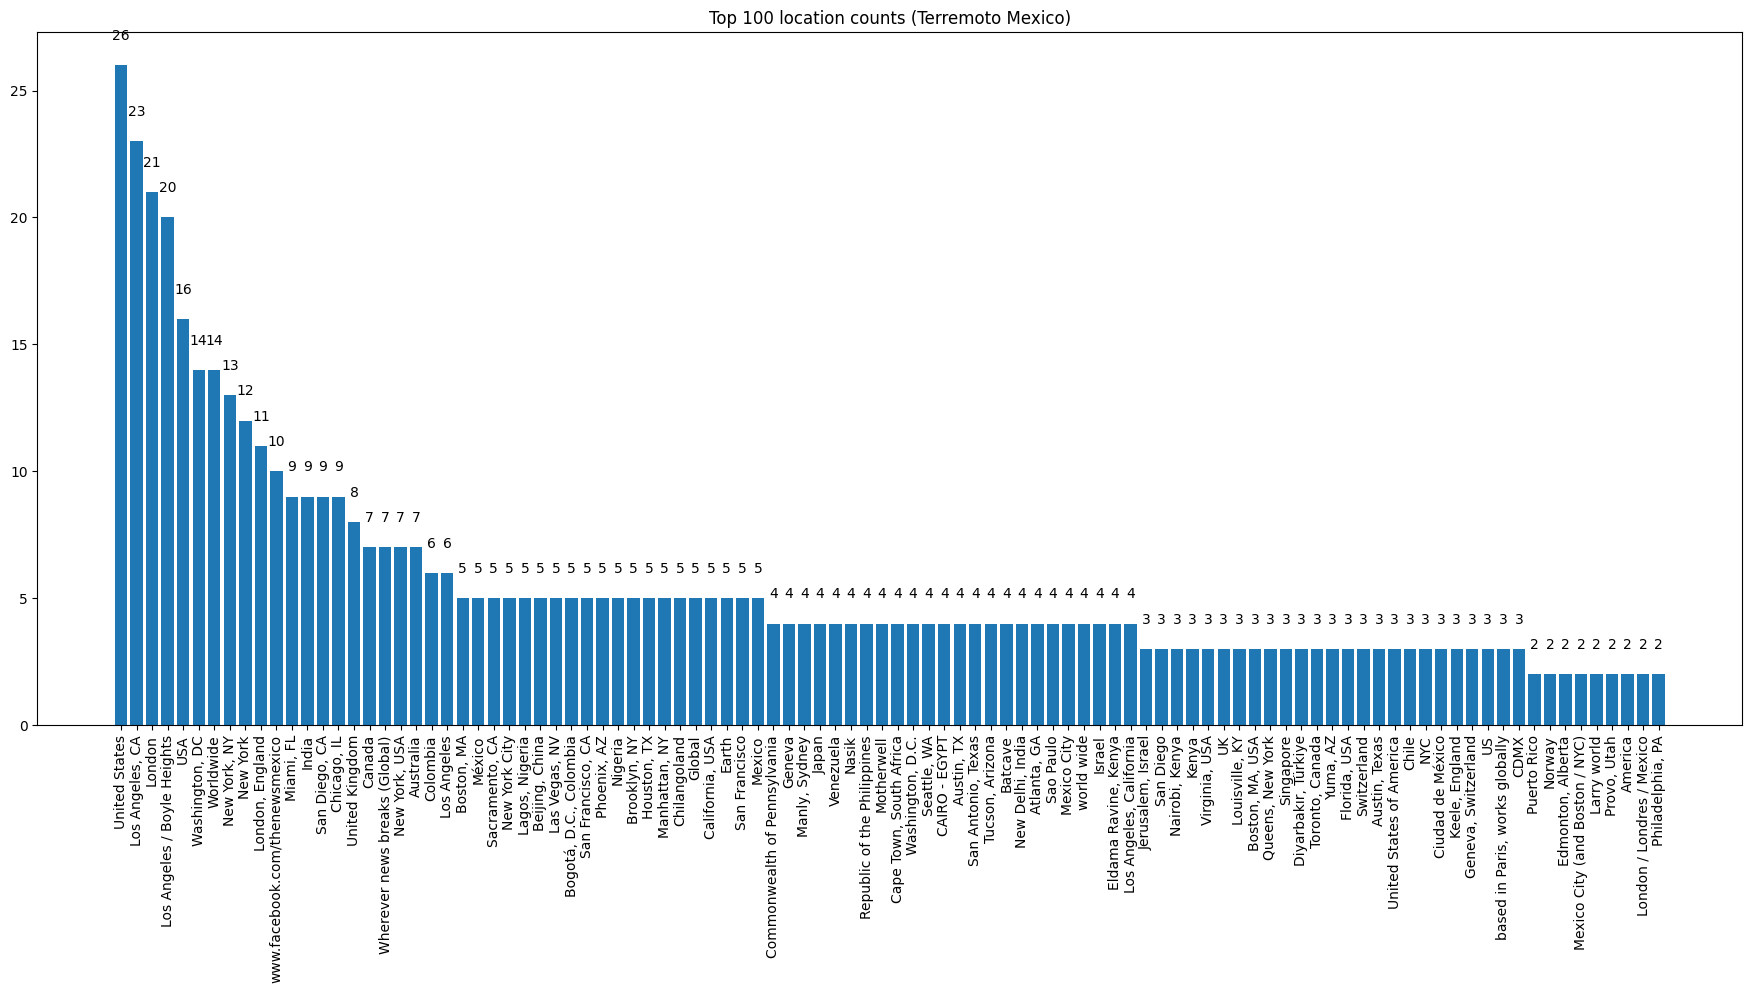

In [8]:
#text_human = mexico2017["text_human"].value_counts()
#text_info = mexico2017["text_info"].value_counts()
#user_location = mexico2017["user_location"].value_counts()

plt.bar(text_human_counts.index, text_human_counts.values)

for i, v in enumerate(text_human_counts.values):
    plt.text(i, v + 1, str(v), ha="center")

plt.xlabel("")
plt.ylabel("")
plt.title("text_human (Terremoto Mexico)")

plt.xticks(rotation=90)
plt.show()

plt.bar(text_info_counts.index, text_info_counts.values)

for i, v in enumerate(text_info_counts.values):
    plt.text(i, v + 1, str(v), ha="center")

plt.xlabel("")
plt.ylabel("")
plt.title("text_info (Terremoto Mexico)")

plt.xticks(rotation=90)

plt.show()

# Crear una figura con un tamaño personalizado
plt.figure(figsize=(22, 9))  # Ajusta los valores de ancho y alto según tus necesidades

plt.bar(user_location_counts.index, user_location_counts.values)

for i, v in enumerate(user_location_counts.values):
    plt.text(i, v + 1, str(v), ha="center")

plt.xlabel("")
plt.ylabel("")
plt.title("Top 100 location counts (Terremoto Mexico)")

plt.xticks(rotation=90)
plt.show()

## Huracan Maria 

In [3]:
# Creamos el nuevo df con los datos mezclados
maria_json = load_json('RDATA/CrisisMMD_v2.0/json/hurricane_maria_final_data.json')
maria_tsv = pd.read_table('RDATA/CrisisMMD_v2.0/annotations/hurricane_maria_final_data.tsv')
maria = pd.merge(maria_json, maria_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                    left_on='id', right_on='tweet_id', how='left')
maria.drop('tweet_id',axis=1,inplace=True)
maria.T

,0,1,2,3,4,5,6,7,8,9,...,4413,4414,4415,4416,4417,4418,4419,4420,4421,4422
id,910523362950053888,910516674390093824,910523400384155648,910523251138293760,910523554130784256,910523785970835457,910524110828171264,910524331150757888,910512243640545280,910524535757262851,...,929502124723048449,929504336094416897,929504648339361798,929506499289743360,929518021449629696,913962161772355585,929534542364446721,929538942764011520,929574229992968193,929587793235468289
lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
text,Hurricane Maria hits Puerto Rico after slammin...,Hurricane Maria ripped the roofs off these hom...,PHOTOS: Hurricane Maria pummels the Caribbean ...,Hurricane Maria blasts Puerto Rico with high w...,https://t.co/XP1uEFa9rI Thousands in shelters ...,Maria still a destructive Cat 4 hurricane over...,Hurricane Maria makes landfall in Puerto Rico ...,NBC News Special Report: Hurricane Maria Makes...,.@fema has a resource page for #Maria informat...,"Photos show destruction, damage from Hurricane...",...,Just bought our tickets to Puerto Rico for spr...,Also check out the table to send support for H...,"Thank you @TeamRubicon, free medical care at D...",3/10 first person to donated for hurricane mar...,Calm before the storm. NCS D2 Football Playoff...,Puerto Rico you are in our hearts...you are no...,@realDonaldTrump @ricardorossello \nEXECUTIVE ...,@JoyAnnReid 65% of Puerto Rico still without p...,Puerto Rico rises with #UMC help ἟5἟7\nhttps:/...,My Fuji gotten to lean on everything in Puerto...
favorite_count,0,184,0,0,0,0,0,0,28,0,...,0,0,0,0,0,3,0,0,0,0
retweet_count,0,194,0,1,0,0,0,0,40,0,...,0,0,0,0,0,1,0,0,0,0
possibly_sensitive,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
created_at,Wed Sep 20 15:17:41 +0000 2017,Wed Sep 20 14:51:06 +0000 2017,Wed Sep 20 15:17:50 +0000 2017,Wed Sep 20 15:17:14 +0000 2017,Wed Sep 20 15:18:26 +0000 2017,Wed Sep 20 15:19:21 +0000 2017,Wed Sep 20 15:20:39 +0000 2017,Wed Sep 20 15:21:31 +0000 2017,Wed Sep 20 14:33:30 +0000 2017,Wed Sep 20 15:22:20 +0000 2017,...,Sun Nov 12 00:12:30 +0000 2017,Sun Nov 12 00:21:17 +0000 2017,Sun Nov 12 00:22:32 +0000 2017,Sun Nov 12 00:29:53 +0000 2017,Sun Nov 12 01:15:40 +0000 2017,Sat Sep 30 03:02:14 +0000 2017,Sun Nov 12 02:21:19 +0000 2017,Sun Nov 12 02:38:48 +0000 2017,Sun Nov 12 04:59:01 +0000 2017,Sun Nov 12 05:52:55 +0000 2017
is_quote_status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities_hashtags_text,None,None,None,None,None,None,None,None,"[Maria, safety]",None,...,[SetToJet],None,"[VeteransDay, HurricaneMaria]",[klaroline],None,None,None,None,[UMC],"[LVPR16, lamblas]"
entities_urls,True,True,True,True,True,True,True,True,True,True,...,False,True,False,False,False,False,False,False,True,True


## Huracan Irma

In [4]:
# Creamos el nuevo df con los datos mezclados
irma_json = load_json('RDATA/CrisisMMD_v2.0/json/hurricane_irma_final_data.json')
irma_tsv = pd.read_table('RDATA/CrisisMMD_v2.0/annotations/hurricane_irma_final_data.tsv')
irma = pd.merge(irma_json, irma_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                    left_on='id', right_on='tweet_id', how='left')
irma.drop('tweet_id',axis=1,inplace=True)
irma.T

,0,1,2,3,4,5,6,7,8,9,...,4381,4382,4383,4384,4385,4386,4387,4388,4389,4390
id,905614952815140864,905624176135995392,905237791470211072,905625059326353409,905567907081584641,905542946451320834,905624599823515649,905625106583609344,905625115941068800,905510651329699844,...,910269754132369408,910269775648919553,910269786306658305,910269787389022214,907770813289558016,910270036861886465,910270462822895617,910270554812317697,910270595262291968,910270769653075969
lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
text,Island of Barbuda 'literally under water' afte...,Hurricane Irma threatens luxury Trump properti...,BREAKING NEWS: Hurricane Irma now big enough t...,JUST IN: 11PM #Hurricane #Irma update. @ABC7Ne...,"Hurricane Irma destroys ""upwards of 90%"" of Ba...",5 PM track and update for Hurricane Irma. #flw...,Here is the 11 pm advisory for Hurricane #Irma...,.@LDSchurch releases statement on Hurricane #I...,Hurricane Irma: storm batters Caribbean island...,JetBlue is selling $99 tickets so that people ...,...,#DryTortugus #keywest #Irma Thoughts with ever...,Preliminary estimates show the combined costs ...,#IrmaRecovery Update: \n◼ FL customer ⚡ outage...,"First it's Irma, now it's the Flu and a Respir...",Get tips to help kids affected by #Harvey or #...,Hurricane Irma First Impacts On Nassau Bahamas...,Local Resources #Irma https://t.co/CphnkQ6y37,Whoa! Is @Delta about to pull off one more las...,New story in Science &amp; Health from Time: h...,Watch: Two cyclists spotted out for a ride in ...
favorite_count,3,49,9221,0,1925,18,1,0,0,280,...,0,0,0,0,29,0,0,0,0,0
retweet_count,9,22,9444,0,3221,41,3,0,0,314,...,0,0,0,0,24,0,0,0,0,0
possibly_sensitive,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
created_at,Thu Sep 07 02:13:24 +0000 2017,Thu Sep 07 02:50:03 +0000 2017,Wed Sep 06 01:14:42 +0000 2017,Thu Sep 07 02:53:34 +0000 2017,Wed Sep 06 23:06:28 +0000 2017,Wed Sep 06 21:27:17 +0000 2017,Thu Sep 07 02:51:44 +0000 2017,Thu Sep 07 02:53:45 +0000 2017,Thu Sep 07 02:53:47 +0000 2017,Wed Sep 06 19:18:57 +0000 2017,...,Tue Sep 19 22:29:56 +0000 2017,Tue Sep 19 22:30:01 +0000 2017,Tue Sep 19 22:30:03 +0000 2017,Tue Sep 19 22:30:03 +0000 2017,Wed Sep 13 01:00:02 +0000 2017,Tue Sep 19 22:31:03 +0000 2017,Tue Sep 19 22:32:45 +0000 2017,Tue Sep 19 22:33:06 +0000 2017,Tue Sep 19 22:33:16 +0000 2017,Tue Sep 19 22:33:58 +0000 2017
is_quote_status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities_hashtags_text,None,None,[Irma2017],"[Hurricane, Irma, weather]",None,"[flwx, gawx, jaxwx]","[Irma, FirstAlertWX]",[Irma],None,None,...,"[DryTortugus, keywest, Irma]","[Harvey, Irma]",[IrmaRecovery],[RoadToRecovery],"[Harvey, Irma]",None,[Irma],[HurricaneMaria],None,None
entities_urls,True,True,False,False,True,False,False,False,True,True,...,False,True,True,True,True,True,False,True,True,True


## Huracan Harvey

In [5]:
# Creamos el nuevo df con los datos mezclados
harvey_json = load_json('RDATA/CrisisMMD_v2.0/json/hurricane_harvey_final_data.json')
harvey_tsv = pd.read_table('RDATA/CrisisMMD_v2.0/annotations/hurricane_harvey_final_data.tsv')
harvey = pd.merge(harvey_json, harvey_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                    left_on='id', right_on='tweet_id', how='left')
harvey.drop('tweet_id',axis=1,inplace=True)
harvey.T

,0,1,2,3,4,5,6,7,8,9,...,4316,4317,4318,4319,4320,4321,4322,4323,4324,4325
id,901548512709574657,901604877029257216,901646127895863296,901194985885777920,901644108023832576,901158123825754113,901645886400421888,901646377620578304,901646404040437760,901558001261268992,...,903115028982751232,910261798569472003,910262990540242944,910263603533664261,910263603533664261,910263603533664261,910263603533664261,910265204990029824,910268744697397248,910269781588299776
lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
text,#ajwamood : Harvey the first major hurricane t...,When we get back to SCHS after Harvey hits : h...,Not always good when your city shows up on a s...,Side by side satellite images compare the size...,Let Steve Harvey nowhere near the judges score...,We Survived Once We Can Survive Again #Hurrica...,My street in SE #Houston is now a river. That ...,Texas county's long recovery from Hurricane Ha...,hypervocal: Help Hurricane Harvey Victims in T...,@abc13houston Tornado forming on Barker Cypres...,...,All wet.\n\n#resist #Harvey #presidential http...,Hurricane Harvey's Latest Victim: @HoustonBall...,Houston was built for cars. What happens when ...,We delivered our relief efforts to Rockport to...,We delivered our relief efforts to Rockport to...,We delivered our relief efforts to Rockport to...,We delivered our relief efforts to Rockport to...,"Get your parts from the best in the industry, ...",3 hats for #HurricaneHarvey fundraiser. So pr...,.@UWMadison students in Houston to aid post-Ha...
favorite_count,0,14,0,30970,23,9042,0,0,0,63,...,239,0,0,0,0,0,0,0,0,0
retweet_count,1,9,0,25263,11,4404,1,0,0,44,...,105,0,0,0,0,0,0,0,0,0
possibly_sensitive,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
created_at,Sat Aug 26 20:54:50 +0000 2017,Sun Aug 27 00:38:48 +0000 2017,Sun Aug 27 03:22:43 +0000 2017,Fri Aug 25 21:30:02 +0000 2017,Sun Aug 27 03:14:41 +0000 2017,Fri Aug 25 19:03:34 +0000 2017,Sun Aug 27 03:21:45 +0000 2017,Sun Aug 27 03:23:42 +0000 2017,Sun Aug 27 03:23:49 +0000 2017,Sat Aug 26 21:32:32 +0000 2017,...,Thu Aug 31 04:39:36 +0000 2017,Tue Sep 19 21:58:19 +0000 2017,Tue Sep 19 22:03:03 +0000 2017,Tue Sep 19 22:05:29 +0000 2017,Tue Sep 19 22:05:29 +0000 2017,Tue Sep 19 22:05:29 +0000 2017,Tue Sep 19 22:05:29 +0000 2017,Tue Sep 19 22:11:51 +0000 2017,Tue Sep 19 22:25:55 +0000 2017,Tue Sep 19 22:30:02 +0000 2017
is_quote_status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities_hashtags_text,"[ajwamood, US]",None,"[HurricaneHarvey, ItAintOverYet]",None,[MayweathervMcgregor],[HurricaneHarvey],"[Houston, Harvey]",None,None,None,...,"[resist, Harvey, presidential]",None,[Harvey],"[Tackleberrys, harvey]","[Tackleberrys, harvey]","[Tackleberrys, harvey]","[Tackleberrys, harvey]",None,"[HurricaneHarvey, pugchat]",None
entities_urls,False,False,False,False,False,False,False,True,True,False,...,False,True,True,False,False,False,False,True,False,True


## Terremoto Iraq

In [7]:
# Creamos el nuevo df con los datos mezclados

iraq_json = load_json('RDATA/CrisisMMD_v2.0/json/iraq_iran_earthquake_final_data.json')
iraq_tsv = pd.read_table('RDATA/CrisisMMD_v2.0/annotations/iraq_iran_earthquake_final_data.tsv')
iraq = pd.merge(iraq_json, iraq_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                    left_on='id', right_on='tweet_id', how='left')
iraq.drop('tweet_id',axis=1,inplace=True)
iraq.T

,0,1,2,3,4,5,6,7,8,9,...,574,575,576,577,578,579,580,581,582,583
id,929945093804617729,929977545260523520,929988832623316993,929896865776259072,929989459453595648,929989477828911104,929966930508775424,929989549895438336,929978536340938754,929989743810576384,...,931691151236780037,931771549685899264,931771549685899264,931789781087981568,931824949509140480,931880697752567808,931898198569996288,931925410224529410,932000082072948736,932027639589507072
lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
text,UPDATE:\nDeath toll from Iran’s quake rises to...,We pray for all those affected by the earthqua...,JUST IN: Death toll reaches 328 in Iran earthq...,A magnitude 7.2 earthquake struck northern Ira...,Video: 7.2-magnitude earthquake jolts #Iran-Ir...,#BREAKING: Iran earthquake toll rises to 328 d...,Iran-Iraq border earthquake latest:\n- At leas...,WSJ: Earthquake near Iran-Iraq border kills mo...,Hundreds dead after powerful #earthquake hits ...,Turkey rushes to help Iraq earthquake victims ...,...,The 2017 Iran-Iraq Earthquake from Sentinel-1....,Less than 24 hours after the earthquake hit #I...,Less than 24 hours after the earthquake hit #I...,"14 min.ago #earthquake 3.8 has hit Kerman, Ira...",IOC voices readiness to help earthquake-affect...,Damage proxy maps of 5 cities near the epicent...,#Iran Daily: US Treasury Blocks Donations for ...,#Kurdish children's situation after the #earth...,#IRAN'S #EARTHQUAKE EXPOSES #POLITICAL RIFTS A...,Victims of last week's earthquake gather outdo...
favorite_count,10,5,5,2,0,0,61,0,24,0,...,0,0,0,0,0,0,0,0,0,0
retweet_count,23,5,10,3,0,0,121,0,31,0,...,0,0,0,0,0,0,0,0,0,0
possibly_sensitive,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
created_at,Mon Nov 13 05:32:42 +0000 2017,Mon Nov 13 07:41:39 +0000 2017,Mon Nov 13 08:26:30 +0000 2017,Mon Nov 13 02:21:04 +0000 2017,Mon Nov 13 08:29:00 +0000 2017,Mon Nov 13 08:29:04 +0000 2017,Mon Nov 13 06:59:28 +0000 2017,Mon Nov 13 08:29:21 +0000 2017,Mon Nov 13 07:45:35 +0000 2017,Mon Nov 13 08:30:07 +0000 2017,...,Sat Nov 18 01:10:55 +0000 2017,Sat Nov 18 06:30:23 +0000 2017,Sat Nov 18 06:30:23 +0000 2017,Sat Nov 18 07:42:50 +0000 2017,Sat Nov 18 10:02:35 +0000 2017,Sat Nov 18 13:44:06 +0000 2017,Sat Nov 18 14:53:39 +0000 2017,Sat Nov 18 16:41:46 +0000 2017,Sat Nov 18 21:38:29 +0000 2017,Sat Nov 18 23:28:00 +0000 2017
is_quote_status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities_hashtags_text,[earthquake],None,None,[Iraq],[Iran],[BREAKING],None,None,[earthquake],None,...,None,"[Iraq, NiliMajumder]","[Iraq, NiliMajumder]",[earthquake],None,"[Kermanshah, Iran]",[Iran],"[Kurdish, earthquake, Iran]","[IRAN, EARTHQUAKE, POLITICAL, GOVERNANCE]",[Iran]
entities_urls,False,False,False,False,True,False,True,True,True,True,...,False,False,False,True,True,False,True,False,True,False


## Inundaciones Srilanka

In [6]:
# Creamos el nuevo df con los datos mezclados

srilanka_json = load_json('RDATA/CrisisMMD_v2.0/json/srilanka_floods_final_data.json')
#srilanka_json.head()
srilanka_tsv = pd.read_table('RDATA/CrisisMMD_v2.0/annotations/srilanka_floods_final_data.tsv')
srilanka = pd.merge(srilanka_json, srilanka_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                     left_on='id', right_on='tweet_id', how='left')
srilanka.drop('tweet_id',axis=1,inplace=True)
srilanka.T


Una o más columnas no existen en el archivo JSON: 'reply_count'


,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
id,869863890376572929,869950122972635136,868880211697430528,869954479524691968,869957051547435008,869957461993635840,869962038214131712,869963334401052673,869967714948849664,869841420315656193,...,881612317317836800,881612317317836800,881612317317836800,881612317317836800,881632991776301056,881714673157980160,881749861871362049,881770990556131328,881807298930368513,869578299487404032
lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
text,#Iran #News #Us Foreign aid arrives in as Sri ...,#FloodSL They still need our help #Flood2017 #...,Death toll from Sri Lanka's worst flood since ...,open our hands for them along with prayer.\n...,#FloodSL Response: State vs. Private https://t...,https://t.co/Z4mxTO7fpp Indian Navy carries ou...,"Sri Lanka’s flood survivors at risk of dengue,...",Posted by Chathura Udeshka to SL Disaster Reli...,#FloodSL 200+ deaths reported due to floods an...,This guy is building a phone charger with 40 c...,...,"Mora, Lakin, Immaris, and our DM are officiall...","Mora, Lakin, Immaris, and our DM are officiall...","Mora, Lakin, Immaris, and our DM are officiall...","Mora, Lakin, Immaris, and our DM are officiall...",https://t.co/7VqAlUWTUO My #wine tip for this ...,Get to mora and try the whole menu https://t.c...,"Mirka Mora (b.1928), noted French-born Austral...","@PaulMalignaggi Lol What u on about, Sergio Mo...",#Cameroon : 4 #female suicide #Bombers kill 1 ...,it happened during the visit of #CycloneMora o...
favorite_count,0,0,226,0,0,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,0
retweet_count,45,0,354,0,0,0,0,0,0,16,...,0,0,0,0,0,0,0,0,0,1
possibly_sensitive,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
created_at,Wed May 31 10:31:27 +0000 2017,Wed May 31 16:14:06 +0000 2017,Sun May 28 17:22:40 +0000 2017,Wed May 31 16:31:25 +0000 2017,Wed May 31 16:41:38 +0000 2017,Wed May 31 16:43:16 +0000 2017,Wed May 31 17:01:27 +0000 2017,Wed May 31 17:06:36 +0000 2017,Wed May 31 17:24:01 +0000 2017,Wed May 31 09:02:10 +0000 2017,...,Sun Jul 02 20:35:30 +0000 2017,Sun Jul 02 20:35:30 +0000 2017,Sun Jul 02 20:35:30 +0000 2017,Sun Jul 02 20:35:30 +0000 2017,Sun Jul 02 21:57:39 +0000 2017,Mon Jul 03 03:22:14 +0000 2017,Mon Jul 03 05:42:03 +0000 2017,Mon Jul 03 07:06:01 +0000 2017,Mon Jul 03 09:30:17 +0000 2017,Tue May 30 15:36:37 +0000 2017
is_quote_status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities_hashtags_text,"[Iran, News, Us]","[FloodSL, Flood2017, srilanka, FloodReliefLKA]",None,None,[FloodSL],None,None,"[floodsl, lka]","[FloodSL, lka, HelpSriLanka]",[FloodSL],...,None,None,None,None,"[wine, weekend]",None,[womensart],None,"[Cameroon, female, Bombers]",[CycloneMora]
entities_urls,True,False,True,True,True,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


## Incendio California

In [14]:
# Creamos el nuevo df con los datos mezclados

california_json = load_json('RDATA/CrisisMMD_v2.0/json/california_wildfires_final_data.json')
california_tsv = pd.read_table('RDATA/CrisisMMD_v2.0/annotations/california_wildfires_final_data.tsv')
california = pd.merge(california_json, california_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                    left_on='id', right_on='tweet_id', how='left')
california.drop('tweet_id',axis=1,inplace=True)
california.T


,0,1,2,3,4,5,6,7,8,9,...,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
id,917791130590183424,917787635946524674,917500054742605829,917623252264062976,917792930315821057,917792147700465664,917715928271507456,917794232160661505,917433167014920192,917793736918216706,...,923725791086526466,923727709641084928,923731648033669121,923743588260880384,923760012735938560,923761170967797761,923796193670336512,923821955568013313,923844053426348032,923879231175630848
lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
text,PHOTOS: Deadly wildfires rage in California ht...,Wildfires raging through Northern California a...,"PLS SHARE: We’re capturing wildfire response, ...",California's raging wildfires as you've never ...,Mass Evacuations in California as Wildfires Ki...,Wildfires Threaten California’s First Legal Ca...,Southern California fire shrouds Disneyland An...,At Least 11 Dead and 100 Missing as Wildfires ...,California wildfires destroy more than 50 stru...,California wildfire. ὡ4 https://t.co/a8oD5rkDdI,...,Go to https://t.co/MDFk59X16v and grab a shirt...,"California Wildfires Toll: 42 Dead, $1 Billio...",Wildfires in California - Brush Fire in Anahei...,Montana fire crews back from California https:...,Hear from one Sulphur native who survived the ...,GOP targets environmental rules after Californ...,Motorcycle crash sparked 350-acre fire in Clev...,Carl’s Jr. #SantaRosa catches #Fire while maki...,Inside the List: The Romance Writer Who Almost...,"How long will heat, wildfire threat persist in..."
favorite_count,0,7,289,228,0,0,133,0,1,0,...,0,0,0,0,0,0,0,0,0,0
retweet_count,0,5,479,216,0,0,76,0,2,0,...,0,0,0,0,0,0,0,0,0,0
possibly_sensitive,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
created_at,Tue Oct 10 16:37:11 +0000 2017,Tue Oct 10 16:23:18 +0000 2017,Mon Oct 09 21:20:34 +0000 2017,Tue Oct 10 05:30:06 +0000 2017,Tue Oct 10 16:44:21 +0000 2017,Tue Oct 10 16:41:14 +0000 2017,Tue Oct 10 11:38:22 +0000 2017,Tue Oct 10 16:49:31 +0000 2017,Mon Oct 09 16:54:46 +0000 2017,Tue Oct 10 16:47:33 +0000 2017,...,Fri Oct 27 01:39:25 +0000 2017,Fri Oct 27 01:47:02 +0000 2017,Fri Oct 27 02:02:41 +0000 2017,Fri Oct 27 02:50:08 +0000 2017,Fri Oct 27 03:55:24 +0000 2017,Fri Oct 27 04:00:00 +0000 2017,Fri Oct 27 06:19:10 +0000 2017,Fri Oct 27 08:01:32 +0000 2017,Fri Oct 27 09:29:21 +0000 2017,Fri Oct 27 11:49:08 +0000 2017
is_quote_status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities_hashtags_text,None,None,None,None,[CaliforniaWildfires],None,None,None,[KAKEnews],None,...,None,[Survival],None,None,None,None,[california],"[SantaRosa, Fire, Burgers]",None,None
entities_urls,True,True,True,True,True,True,True,False,True,False,...,True,True,True,True,True,True,True,True,True,True


In [15]:
l = []
#l.append(california['lang'].unique())
#l.append(srilanka['lang'].unique())
l.append(mexico2017['user_location'].unique())
#l.append(maria['lang'].unique())
#l.append(iraq['lang'].unique())
#l.append(irma['lang'].unique())
#l.append(harvey['lang'].unique())
print(l)

[array(['Barcelona', 'india', 'ישראל', None, 'Chester, UK', 'New York, NY',
       'Gainesville, GA ', 'Nairobi, Kenya', 'Earth', 'Washington, DC',
       'Gurgaon', 'global', 'USSANews.com', 'Australia',
       'California, USA', 'UK', 'Worldwide', 'Top part of California',
       'United Kingdom', 'Los Angeles, CA', 'Louisville, KY',
       'Hollywood, CA', 'London', 'U.K.', 'Bonn, Germany', 'India',
       'San Francisco', 'Nuevo Vallarta, Mexico', 'Redmond, WA, USA',
       'New Delhi, Delhi', 'Milwaukee', 'London, England', 'Phoenix',
       'www.facebook.com/doctorreefer/', 'Mexico', 'Zug, Schweiz',
       'BELIEVE IN ANGELS! ✝', 'Munich, Germany', 'Israel', 'Beijing',
       'Dayton, OH', 'Greensboro/Winston-Salem NC',
       '37 Kensington High St | London', 'english@nrttv.com',
       'Germany / Great Britain', 'Abuja, Nigeria',
       'MIA/LA/LV/NYC & All Over The World', 'Mexico City',
       'San Antonio, Texas', 'Phoenix, AZ', 'Ireland / London ',
       'Everywhere', 'wor

In [16]:
(california["favorite_count"]==0).sum()

1478

In [17]:
print(california[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].describe())

       quote_count  favorite_count  reply_count  retweet_count
count  1569.000000     1569.000000  1569.000000    1569.000000
mean      0.189930        2.040153     0.237731       1.873805
std       1.379839       15.920892     1.862000      16.791014
min       0.000000        0.000000     0.000000       0.000000
25%       0.000000        0.000000     0.000000       0.000000
50%       0.000000        0.000000     0.000000       0.000000
75%       0.000000        0.000000     0.000000       0.000000
max      25.000000      289.000000    25.000000     479.000000


<Axes: >

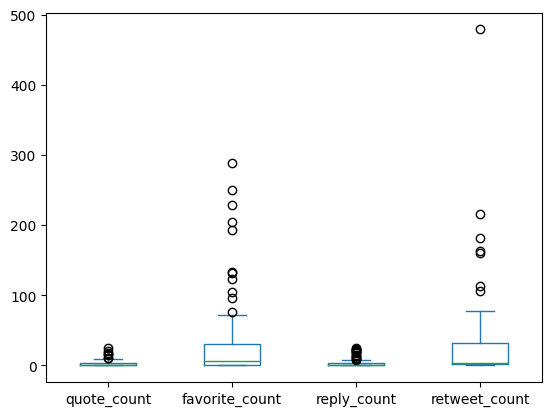

In [18]:
california_reply = california[california['retweet_count'] > 0]
california_reply[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].plot(kind='box')

array([[<Axes: title={'center': 'quote_count'}>,
        <Axes: title={'center': 'favorite_count'}>],
       [<Axes: title={'center': 'reply_count'}>,
        <Axes: title={'center': 'retweet_count'}>]], dtype=object)

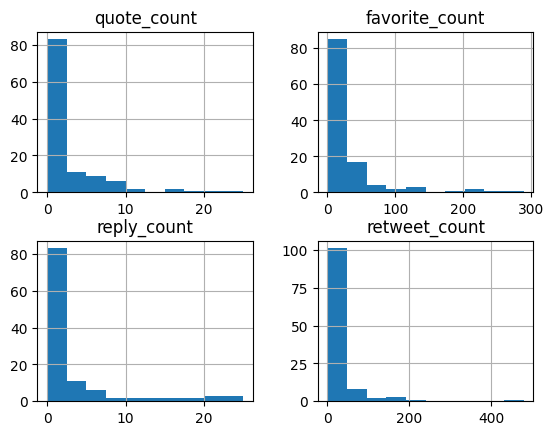

In [19]:
california_reply[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].hist()

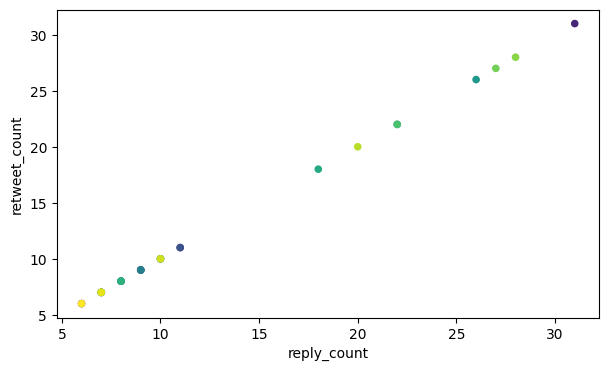

In [20]:
california_location = california.groupby(['user_location']).count()
california_location = california_location[california_location['retweet_count'] > 5]
fig, ax = plt.subplots(figsize=(7, 4))
california_location.plot(kind='scatter', x="reply_count", y="retweet_count", 
                            c=range(1, len(california_location) + 1), colormap='viridis', ax=ax);

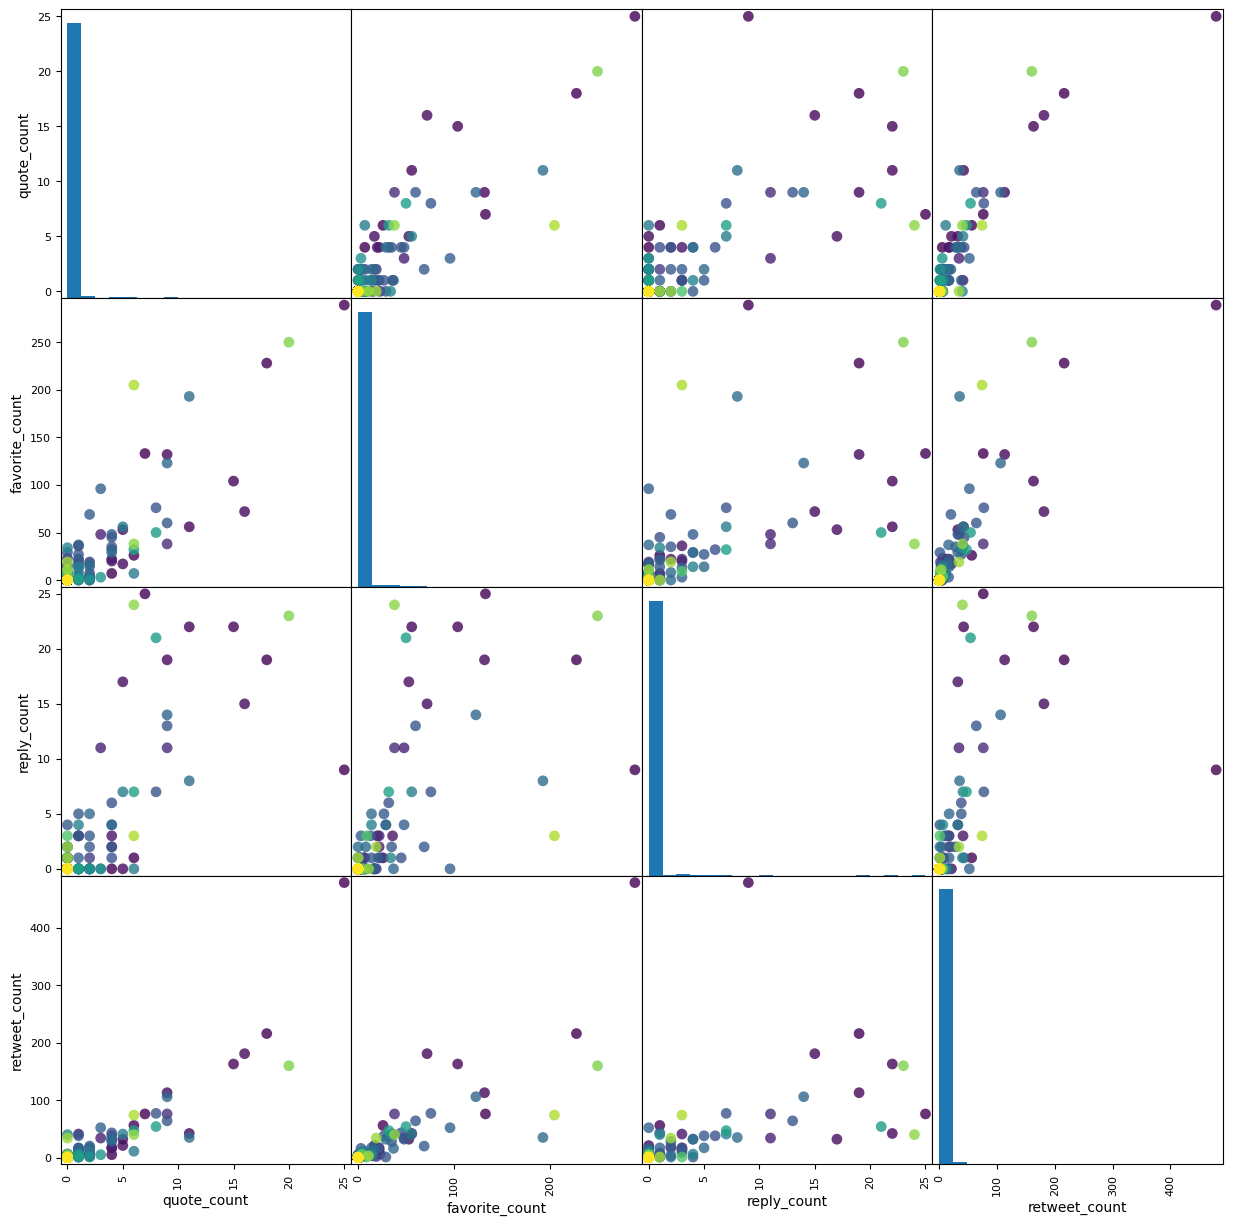

In [21]:
pd.plotting.scatter_matrix(california[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']], c=range(1, len(california[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']]) + 1), figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8);